In [8]:
#%pylab inline
%matplotlib inline
from array import array
import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt
from root_numpy.tmva import add_classification_events, evaluate_reader
from ROOT import TMVA, TFile, TCut

from root_numpy import root2array, rec2array

tree_prefix = '/Users/pigard/CMS/ZZ_analysis/'

branch_names = ['m_jj', 
                'dEta_tj', 
                'm_4l',
                'Z1_zepp', 
                'Z2_zepp', 
                'dPhi_Z1_Z2', 
                'tj1_eta_x_tj2_eta', 
                'costhetastar', 
                'phi', 
                'costheta1', 
                'costheta2', 
                'phi1',
                'vbf_costhetastar',
                'vbf_costheta1',
                'vbf_costheta2',
                'vbf_phi',
                'vbf_phi1',
                'qv1',
                'qv2',
                   
               ]#, 'weight']

signal = root2array(tree_prefix + 'EWK3_VBF.root',
                    "test",
                    branch_names)
signal = rec2array(signal)

backgr = root2array(tree_prefix + 'VBF3_BLS.root',
                    "test",
                    branch_names)
backgr = rec2array(backgr)



/Users/pigard/Envs/default_venv/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


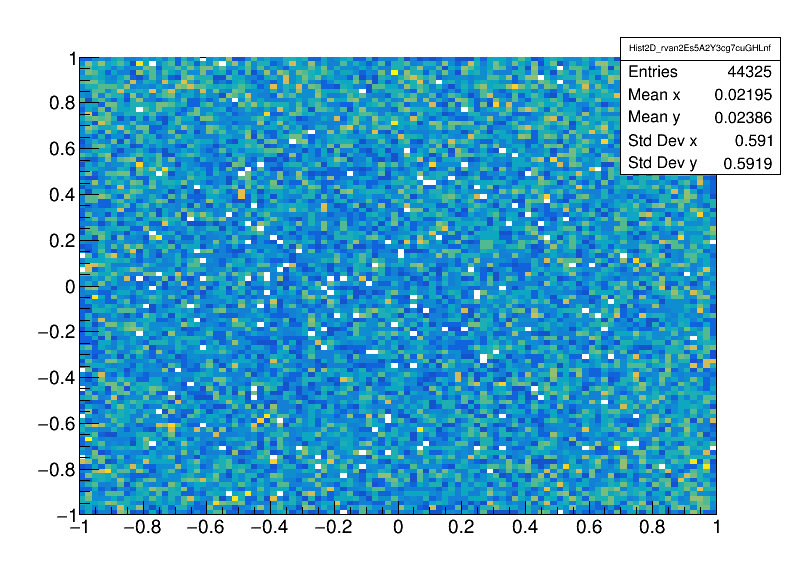

In [2]:
from rootpy.plotting import Hist2D
from ROOT import TCanvas

c = TCanvas("myCanvasName","The Canvas Title",800,600)

theta1_theta2 = Hist2D(100, -1, 1, 100, -1, 1)

slice_theta = signal[:, [9,10]]

#print slice_theta

theta1_theta2.fill_array(slice_theta)

theta1_theta2.Draw("COL")
c.Draw()






signal


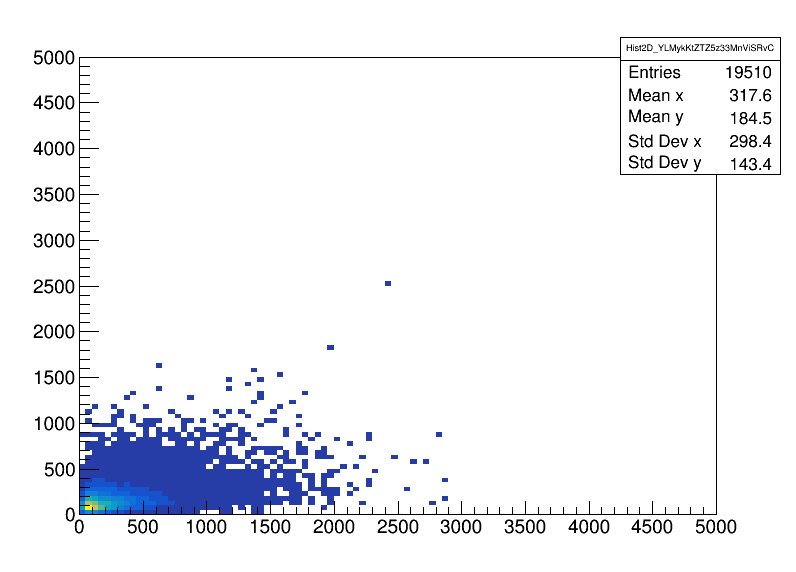

In [3]:
from rootpy.plotting import Hist2D
from ROOT import TCanvas

c = TCanvas("myCanvasName","The Canvas Title",800,600)

theta1_theta2 = Hist2D(100, 0, 5000, 100, 0, 5000)


slice_q = backgr[:, [-1,-2]]

#print slice_theta

theta1_theta2.fill_array(slice_q)

theta1_theta2.Draw("COL")
print 'signal'
c.Draw()



background


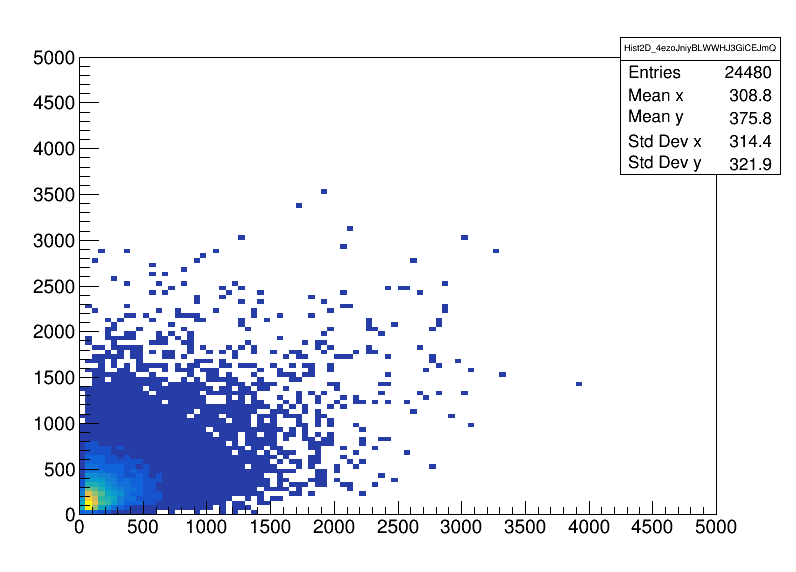

In [21]:
from rootpy.plotting import Hist2D
from ROOT import TCanvas

c = TCanvas("myCanvasName","The Canvas Title",800,600)

theta1_theta2 = Hist2D(100, 0, 5000, 100, 0, 5000)


slice_q = backgr[:, [-1,-2]]

#print slice_theta

theta1_theta2.fill_array(slice_q)

theta1_theta2.Draw("COL")
print 'background'
c.Draw()



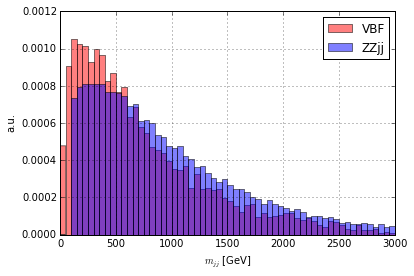

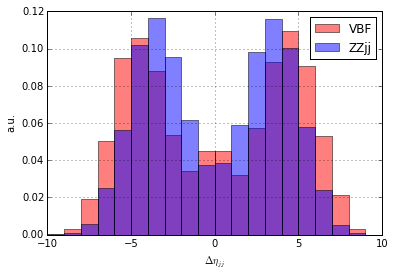

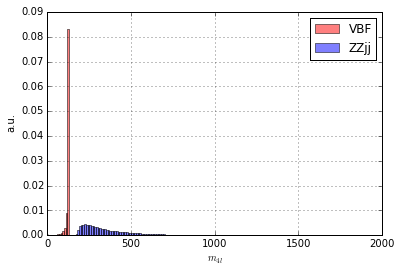

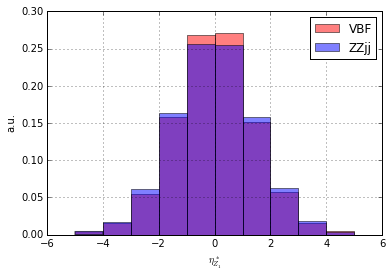

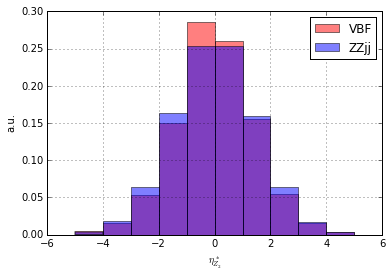

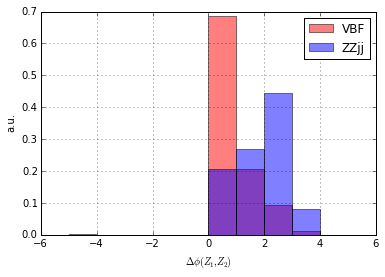

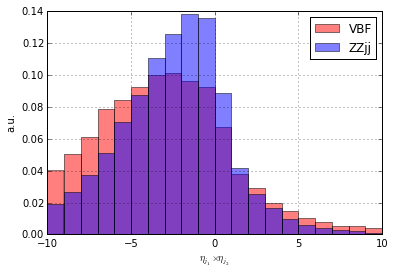

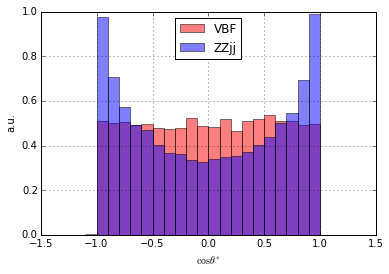

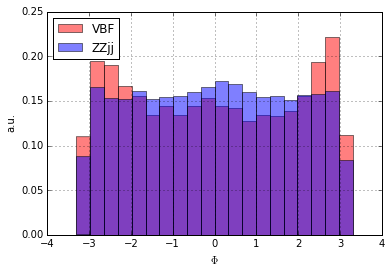

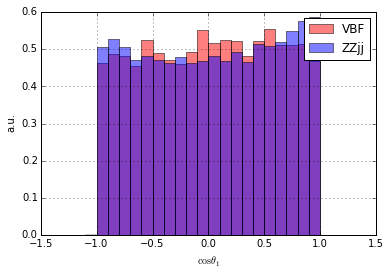

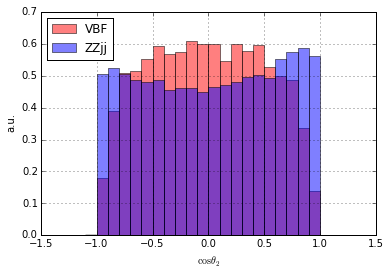

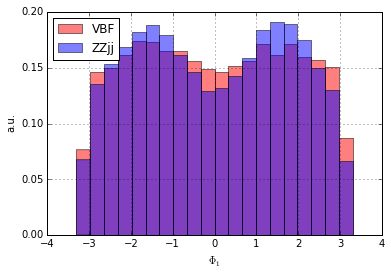

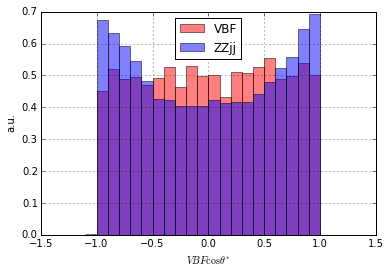

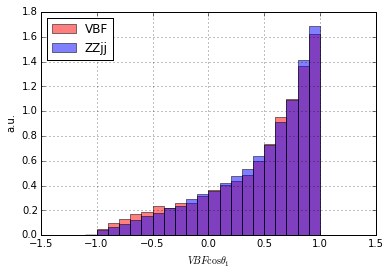

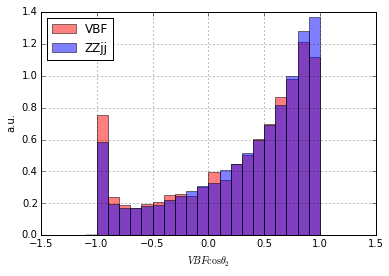

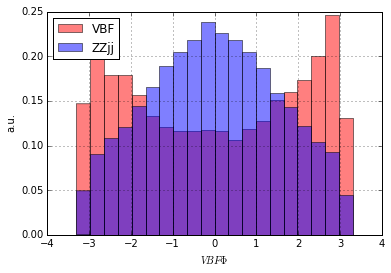

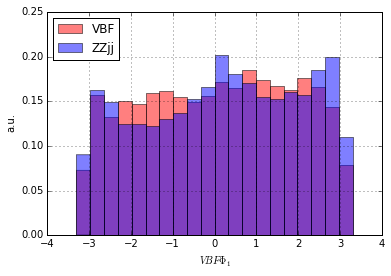

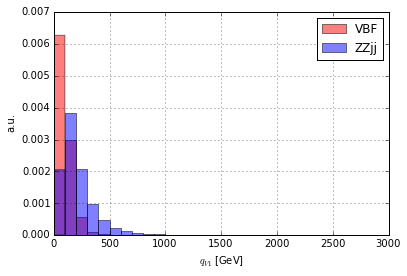

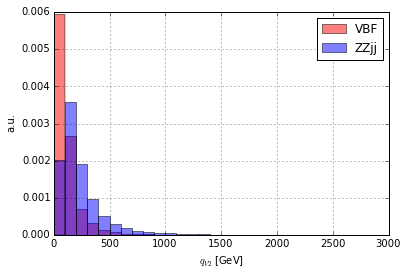

In [9]:
#'costhetastar', 'Phi', 'costheta1', 'costheta2', 'Phi1'
plots = [(r'$m_{jj}$ [GeV]', 60 , [0, 3000]),
         (r'$\Delta\eta_{jj}$', 20, [-10, 10]),
         (r'$m_{4l}$', 200, [0, 2000]),
         (r'$\eta^{*}_{Z_{1}}$', 10, [-5, 5]),
         (r'$\eta^{*}_{Z_{2}}$', 10, [-5, 5]),
         (r'$\Delta\phi(Z_{1}, Z_{2})$', 10, [-5,5]),
         (r'$\eta_{j_{1}}\times\eta_{j_{2}}$', 20, [-10, 10]),
         (r'$\cos{\theta^*}$', 22, [-1.1, 1.1]),
         (r'$\Phi$', 20, [-3.3, 3.3]),
         (r'$\cos \theta_1$', 22, [-1.1, 1.1]),
         (r'$\cos \theta_2$', 22, [-1.1, 1.1]),
         (r'$\Phi_1$', 20, [-3.3, 3.3]),
         (r'$VBF \cos{\theta^*}$', 22, [-1.1, 1.1]),
         (r'$VBF \cos \theta_1$', 22, [-1.1, 1.1]),
         (r'$VBF \cos \theta_2$', 22, [-1.1, 1.1]),
         (r'$VBF \Phi$', 20, [-3.3, 3.3]),
         (r'$VBF \Phi_1$', 20, [-3.3, 3.3]),
         (r'$q_{V1}$ [GeV]', 30 , [0, 3000]),
         (r'$q_{V2}$ [GeV]', 30 , [0, 3000]),         
        ]
#fig = plt.figure()

 #'m_4l','Z1_zepp', 'Z2_zepp', 'dPhi_Z1_Z2', 'tj1_eta_x_tj2_eta'
#plt.subplots(2, 3)
for i in range(len(plots)) :
    #, i+1)
    p = plots[i]
    plt.hist(backgr[:,i], bins=p[1], range=p[2], normed=1, lw=1, alpha=0.5, color = 'red', label='VBF')
    plt.hist(signal[:,i], bins=p[1], range=p[2], normed=1, lw=1, alpha=0.5, label='ZZjj')
#plt.locator_params(nbins=10)
#plt.locator_params(axis='y',nbins=20)
#plt.plot(gbdt_fpr, gbdt_tpr, lw=1, label='GBDT')
#plt.xlim([-0.0, 0.45])
#plt.ylim([-0.05, 1.05])
    plt.xlabel(p[0])
    plt.ylabel('a.u.')
    #plt.title('Receiver operating characteristic')
    plt.legend(loc="best")
    #plt.legend().set_visible(False)
    #plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
    #       ncol=2, mode="expand", borderaxespad=0.)
    #plt.legend(numpoints=1)
    plt.grid()
    plt.show()